# Practical Python Programming for Biologists
Author: Dr. Daniel Pass | www.CompassBioinformatics.com

---

# A quick bit of maths

We will always end up doing some calculations in our coding. The classic opperators apply and work as you would expect (```  +  -  /  *  ```), but to note some more specific cases:
- ```**``` - Exponent (To the power of).

 e.g. ```7 ** 2 = 49```
- ```%``` - Modulo. Return just the remainder of a division.

 e.g. ```17 % 5 = 2```

Lets see whether our gene has a perfect amino acid translation. 3 bases per codon so our modulo would return zero if perfect:

In [1]:
my_ORF = "ATGGTACGACTCACATCACATGCATCGTCAACTTC"

print("There are", len(my_ORF) % 3, "bases not in a codon")


There are 2 bases not in a codon


We can also use the opperators (```+ - * /```) together with assigning a variable (```=```) as a shortcut to change it's current value. We do this by combining a maths operator with the equals:
  ```  +=     -=     *=    /=  ```

For example these perform the same function, but one is quicker and easier:

In [2]:
# The slow way
total = 27
total_plus3 = total + 3
total_plus_3_div_2 = total_plus3 / 2
total = total_plus_3_div_2

print(total)

# The fast way!
total = 27
total += 3
total /= 2       # Note how any division returns a float

print(total)

15.0
15.0


Acting alone they don't do too much, but in the context of loops they are super powerful!

# Looping

Really, we know loops are the powerhouse of programming. We have looked at lists, ranges, and dictionaries which have lots of data in them but untill we can run through the full dataset we aren't using them fully.

Running through a collection (term used for any kind of itterable set of data) mostly follows a simple pattern:

```
for item in list:
  do_something(item)
```

Some other coding languanges you may have seen will require an extra character to define your temporary variable but that's not needed in python. Nice and clean!

Python also doesn't use any of those messy parentheses ```[{()}]``` or semi-colons ```;```. You just have to be sure to use tabs/spaces to indent your code blocks. If your code has mixed up indents then it will error.

---

Lets use a for loop to perform a calculation on a list of DNA strings. As you can see once you define the temporary variable after the ```for``` then it can be used as you would any variable.

**Exercise**: try printing ```seq``` outside of the loop and check what you get back.



In [6]:
# Output the length & GC% for a list of DNA sequences
sequences = ["ATGCTGACTATATGAATCGTTTGA", "GCTAGCTAGCTAGCTAGCTG", "CTGACGATCGTACGACTGATCG","ATCGCGCGCGCGCCCTATACG"]

for seq in sequences:
    gc_count = seq.count("G") + seq.count("C")
    length = len(seq)
    PCrounded = round(gc_count / length *100, 2)
    print("Sequence:", seq, "is", length, "bases long with GC%:", PCrounded)

Sequence: ATGCTGACTATATGAATCGTTTGA is 24 bases long with GC%: 33.33
Sequence: GCTAGCTAGCTAGCTAGCTG is 20 bases long with GC%: 55.0
Sequence: CTGACGATCGTACGACTGATCG is 22 bases long with GC%: 54.55
Sequence: ATCGCGCGCGCGCCCTATACG is 21 bases long with GC%: 71.43


Inside a loop, any variable name that is created is temporary. We can also add to global variables which exist outside of the temporary loop.

Lets modify our code so that each time we run through the loop we will add the calculated value to the global variable. Once we've finished with the loop then we can do our calculation on the totals.

In [7]:
# Create the empty variables first (global)
total_GC_count = 0
total_length = 0

for seq in sequences:
    gc_count = seq.count("G") + seq.count("C")
    length = len(seq)
    PCrounded = round(gc_count / length *100, 2)

    # We are adding the temporary variable to the global variable
    total_GC_count += gc_count
    total_length += length

    print("This sequence's GC%:", PCrounded)
    print("Adding:", gc_count, "\t| New total GC count is:", total_GC_count)
    print("Adding:", length, "\t| New total len is:", total_length)
    print()

print("~~~~~~~~~\nOutside the loop now")
print("Total average GC%:", round(total_GC_count / total_length * 100, 2))

This sequence's GC%: 33.33
Adding: 8 	| New total GC count is: 8
Adding: 24 	| New total len is: 24

This sequence's GC%: 55.0
Adding: 11 	| New total GC count is: 19
Adding: 20 	| New total len is: 44

This sequence's GC%: 54.55
Adding: 12 	| New total GC count is: 31
Adding: 22 	| New total len is: 66

This sequence's GC%: 71.43
Adding: 15 	| New total GC count is: 46
Adding: 21 	| New total len is: 87

~~~~~~~~~
Outside the loop now
Total average GC%: 52.87


One notable method we can use is looping through a string. It doesn't come in very useful in normal programming, but in bioinformatics we spend a lot of time with strings and sequences!

To work on each individual character in a string:

In [8]:
my_gene = "ACCCACACCGTGTG"

count = 0

for base in my_gene:
  count += 1
  print("Base number", count, "is a", base)

print("We had", count, "bases!")

Base number 1 is a A
Base number 2 is a C
Base number 3 is a C
Base number 4 is a C
Base number 5 is a A
Base number 6 is a C
Base number 7 is a A
Base number 8 is a C
Base number 9 is a C
Base number 10 is a G
Base number 11 is a T
Base number 12 is a G
Base number 13 is a T
Base number 14 is a G
We had 14 bases!


## Exercises - Looping

We've been out butterfly hunting! For Science!

1. Create a loop that outputs each value in one butterfly list (pick your favourite!) - print each value out
2. Create a ```total_count = 0``` before the loop, and add to it inside the loop
3. After the loop, output the sum and average of the butterfly list. Test it with different lists

Doing that for each species individually would take a long time, so we can do a 2D list and make it much quicker!

4. Create a loop for ```all_butterflies_list``` and put your code from the first parts inside of it, to run for all lists

In [9]:
# Species and counts per day (Mon/Tues/Weds/Thurs/Fri)
Monarch_count = [78, 70, 13, 17, 99]
Swallowtail_count = [6, 16, 44, 50, 44]
PaintedLady_count = [69, 27, 30, 74, 10]
Admiral_count = [66, 87, 74, 49, 65]
Peacock_count = [74, 78, 55, 70, 86]

all_butterflies_list = [Monarch_count, Swallowtail_count, PaintedLady_count, Admiral_count, Peacock_count]

In [61]:
#For Monach only
total_count = 0
number_of_samples = 0

for val in Monarch_count:
    #print(val)
    total_count += val
    number_of_samples += 1
    print("Total count is now", total_count)

print("We collected", total_count, "total Monarchs")
print("number of samples", number_of_samples)
print("Average is", total_count / number_of_samples)


Total count is now 78
Total count is now 148
Total count is now 161
Total count is now 178
Total count is now 277
We collected 277 total Monarchs
number of samples 5
Average is 55.4


One obvious issue here is that we don't have the name of each list so the output is a bit confusing. This is where a dictionary would be more useful than a loop.

**Extension**: Put the list data into a dictionary and create a more readable output!

### Looping & tuples

We saw the format for assigning tuple elements to variable names yesterday, but it wasn't too useful then. Lets see how much better it is in a loop

Here we have a list of tuples with their ID, sequence, and abundance value, and can assign them variable names in the first line of the for loop:

In [95]:
binding_sites = [
    ("TFBS1", "CGTATTATCG", 80),
    ("TFBS2", "ACGTATCGTATTA", 120),
    ("TFBS3", "CTAGGTTA", 90),
    ("TFBS4", "TATTACGTA", 40),
    ("TFBS5", "ATGCTTACG", 110)
]

for ID, seq, abun in binding_sites:
    print("ID", ID, "has abundance", abun)

ID TFBS1 has abundance 80
ID TFBS2 has abundance 120
ID TFBS3 has abundance 90
ID TFBS4 has abundance 40
ID TFBS5 has abundance 110


# While

Using the ```while``` function we can create loops in a slightly different way. Basically we say "if this is true, keep repeating". For example:

In [96]:
count = 0

while count < 5:
  print(count)       ## Don't forget we start at zero!
  count +=1

0
1
2
3
4


An important thing to watch out for with while loops is accidentally creating infinity! Run this and see what happens. What went wrong?

In [ ]:
count = 0

while count >= 0:
  print(count)
  count +=1

We can also use ```while``` to run through lists. It gives us an advantage in running until a condition is met, or getting and modifying the index value.

As we run a while loop for the length of our list, lets use it to access elements of other lists. Note: Here we are assuming our lists are in the same order and the same length! Not the best assumption to make with real data!

In [98]:
expression = [2.3, 4.1, 5.7, 3.9, 6.5]
genes = ['BRCA1', 'TP53', 'EGFR', 'KRAS', 'MET1']
species = ['Arabidopsis', 'Bos taurus', 'C. elegans', 'Drosophila', 'E. coli']
threshold = 5.0
index = 0

while index < len(expression):
  print(genes[index], expression[index], species[index])

  index += 1

BRCA1 2.3 Arabidopsis
TP53 4.1 Bos taurus
EGFR 5.7 C. elegans
KRAS 3.9 Drosophila
MET1 6.5 E. coli


# The Big If!

Lets take a break from loops for a moment to talk about conditionals. These are basically "**if** this **then** that" statements. They are also super powerful and allow us lots of control over our data and code.

When working with numerical data it follows normal mathematical symbols:
```
if x > y:    print("x is greater than y")
if x < y:    print("x is less than y")
if x == y:   print("x is equal to y")
if x != y:   print("x is NOT equal to y")
if x >= y:   print("x is greater than or equal to y")
if x <= y:   print("x is less than or equal to y")
```

Note the ```==``` for equals. A common mistake is to use just one ```=``` character but as we know that assigns a variable value instead.

**Exercise:** Test which if statements print when you change the values

In [99]:
x = 5
y = 10

if x > y:    print("x is greater than y")
if x < y:    print("x is less than y")
if x == y:   print("x is equal to y")
if x != y:   print("x is NOT equal to y")
if x >= y:   print("x is greater than or equal to y")
if x <= y:   print("x is less than or equal to y")

x is less than y
x is NOT equal to y
x is less than or equal to y


Note: What we are really saying is  ```if x > y == True``` then do something, but we don't need to write the second part

## Exercise - While and If

Here we have a fastq style of DNA sequence - The bases themselves, and the quality of each base.

1. Create a while loop to print both the base and the quality at each position
2. Add an if statement to print only the bases where the quality is greater than 20 (What issue would happen with real data?)
- Extension: plot a quick graph of the quality scores!

~~~~~~Exercise 1~~~~~~
i: 0 	base: T 	quality: 31
T
i: 1 	base: G 	quality: 29
G
i: 2 	base: C 	quality: 27
C
i: 3 	base: A 	quality: 35
A
i: 4 	base: T 	quality: 31
T
i: 5 	base: G 	quality: 29
G
i: 6 	base: A 	quality: 34
A
i: 7 	base: C 	quality: 39
C
i: 8 	base: T 	quality: 40
T
i: 9 	base: G 	quality: 30
G
i: 10 	base: C 	quality: 35
C
i: 11 	base: A 	quality: 38
A
i: 12 	base: T 	quality: 30
T
i: 13 	base: C 	quality: 28
C
i: 14 	base: G 	quality: 29
G
i: 15 	base: A 	quality: 30
A
i: 16 	base: T 	quality: 33
T
i: 17 	base: C 	quality: 26
C
i: 18 	base: G 	quality: 24
G
i: 19 	base: T 	quality: 29
T
i: 20 	base: A 	quality: 19
i: 21 	base: C 	quality: 11
i: 22 	base: G 	quality: 17
i: 23 	base: A 	quality: 16
i: 24 	base: T 	quality: 18
i: 25 	base: C 	quality: 17
i: 26 	base: G 	quality: 13
i: 27 	base: A 	quality: 11
i: 28 	base: T 	quality: 16
i: 29 	base: C 	quality: 19
i: 30 	base: G 	quality: 15
i: 31 	base: A 	quality: 3
i: 32 	base: T 	quality: 7
i: 33 	base: C 	quality: 

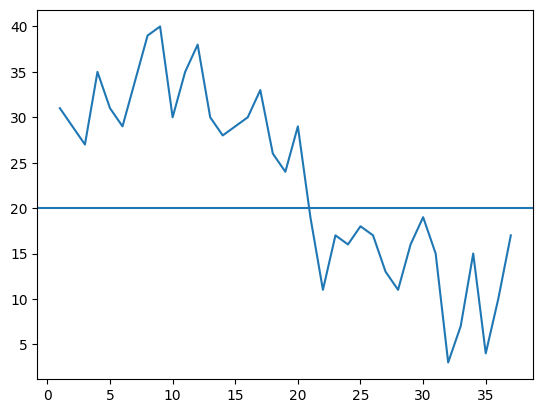

In [139]:
sequence = "TGCATGACTGCATCGATCGTACGATCGATCGATCGAT"
quality = [31, 29, 27, 35, 31, 29, 34, 39, 40, 30, 35, 38, 30, 28, 29, 30, 33, 26, 24, 29, 19, 11, 17, 16, 18, 17, 13, 11, 16, 19, 15, 3, 7, 15, 4, 10, 17]

i = 0

print("~~~~~~Exercise 1~~~~~~")
while i < len(sequence):
    print("i:", i, "\tbase:", sequence[i], "\tquality:", quality[i])

    if quality[i] >20:
        print(sequence[i])

    i += 1

import matplotlib.pyplot as plt
x_axis = range(1,len(quality)+1)
plt.plot(x_axis, quality)
plt.axhline(20)


---
A more real example. Lets check if a single value is less than the a 0.05 significance threshold. Here we have a 2D list which is more complex, but we can access the elements of each list easily with double square brackets ```[ ][ ]```

In [144]:
gene_data = [["TP53", 0.0001],["BRCA1", 0.002],["EGFR", 0.15],["KRAS", 0.00001],["MYC", 0.05]]

# If the value of the first list index (second element) is <0.05, then print the gene ID
if gene_data[0][1] < 0.05:
  print(gene_data[0][0], "has p<0.05")


TP53 has p<0.05


Now lets put that in a loop for all our genes
(How could you re-write this code to use fewer lines?)

In [143]:
for geneID, geneVal in gene_data:
  if geneVal < 0.05:
    print(geneID, "has p<0.05")


TP53 has p<0.05
BRCA1 has p<0.05
KRAS has p<0.05


We can also use an if statement to search within a string. This is a very python-style type of writing as it is very simple and clear, where other languages may require more complexity for comparisons.

Note that although it works nicely, there are more efficient ways to do this with larger datasets.

In [146]:
# Check if a DNA sequence contains a specific motif
sequence = "ATGCTGACTGACGTGAGCTAGCTAGCTAGCTAGCTG"
motif = "GCTAG"

if motif in sequence:
    print("Motif found in the sequence")


species = ['Arabidopsis', 'Bos taurus', 'C. elegans', 'Drosophila', 'E. coli']

if "Arabidopsis" in species:
    print("found it!")


Motif found in the sequence
found it!


## if/else/elif

Ifs are good, but what about if not? We can do that using ```else```

In [147]:
# Check if a DNA sequence length is divisible by 3
sequence = "ATGCTGACTGACGTGAGCTAGCTAGCTAGCTAGCTG"

if len(sequence) % 3 == 0:
    print("The Open Reading Frame has complete codon usage")
else:
    print("The Open Reading Frame does not have complete codons")


The Open Reading Frame has complete codon usage


We can then make it more complicated with elif (short for else-if).

In [148]:
dna_motifs = ["ATCG", "GCTAGA", "ACGAAAT", "TAGAC", "CGAT", "CTGATGGA", "GTTCACTACGGAC", "TGCGTTA", "AGTC", "CGGGAGT", "TATGCG", "GCATTG", "ACCACACACACACACCCC"]

for motif in dna_motifs:
  if len(motif) <= 4:
      print("Short:\t", motif)
  elif len(motif) <= 6:
      print("Medium:\t", motif)
  elif len(motif) <= 8:
      print("Long:\t", motif)
  else:
      print("Woah that's big!", motif)


Short:	 ATCG
Medium:	 GCTAGA
Long:	 ACGAAAT
Medium:	 TAGAC
Short:	 CGAT
Long:	 CTGATGGA
Woah that's big! GTTCACTACGGAC
Long:	 TGCGTTA
Short:	 AGTC
Long:	 CGGGAGT
Medium:	 TATGCG
Medium:	 GCATTG
Woah that's big! ACCACACACACACACCCC


We can access a dictionary in the same way. An ```if``` statement is a useful way to test if the key you are looking for exists. We have a dictionary of SampleIDs and their geographic locations.

Often python is really helpful in it's simplicity because here it knows that asking "if X in dictionary" to check if it is in the keys and if true will come back and continue the statement (in a way that the .get() function doesn't).

In [149]:
sample_locations = {
    'DAP01': (40.7128, -74.0060),
    'DAP02': (51.5074, -0.1278),
    'DAP03': (48.8566, 2.3522),
    'DAP05': (34.0522, -118.2437),
    'DAP06': (35.6895, 139.6917)
}

sample_to_test = "DAP04"

if sample_to_test in sample_locations:
    print(sample_locations[sample_to_test])
else:
    print("That sample is missing")

That sample is missing


## AND/OR/NOT

Just as we get our brains around ```ifs``` and ```elses```, we can also combine multiple together. This is useful for situations such as:

- If gene binding site contains TATTA and is <100bp from TSS....
- If sample count is >100 or in PIs favourite species list
- If antibiotic resistance is present but not in my list of already tested....

They're good examples, lets see what the code would look like:

In [150]:
# Sample TFBS sequences and their distances from TSS
# Note the use of a tuple here for simplicity in the example.
gene_binding_sites = [
    ("TFBS1", "CGTATTATCG", 80),
    ("TFBS2", "ACGTATCGTATTA", 120),
    ("TFBS3", "CTAGGTTA", 90),
    ("TFBS4", "TATTACGTA", 40),
    ("TFBS5", "ATGCTTACG", 110)
]

# Loop over gene binding sites and check conditions
for binding_site in gene_binding_sites:
    # Using the special tuple assigning method
    gene, sequence, distance = binding_site

    if "TATTA" in sequence and distance < 100:
        print("Gene", gene, "matches the conditions")

## Exercise - print only the genes which start with an A or C (there's a method named .startswith()) but are over 100 distance

Gene TFBS1 matches the conditions
Gene TFBS4 matches the conditions


In [151]:
# Sample data: animal names and their corresponding read counts
animal_samples = [
    ("Lion", 7500),
    ("Elephant", 2100),
    ("Giraffe", 1250),
    ("Tiger", 950),
    ("Zebra", 1800)]

# List of PI's favorite species
favorite_species = ["Lion", "Giraffe", "Cheetah"]

# Iterate over animal samples and check conditions
for animal, count in animal_samples:
    if count > 2000 or animal in favorite_species:
        print("Sample", animal, "matches the conditions")

Sample Lion matches the conditions
Sample Elephant matches the conditions
Sample Giraffe matches the conditions


In [152]:
# antibiotics and resistance gene found
antibiotics = [
    ("Amoxicillin", True),
    ("Ciprofloxacin", False),
    ("Gentamicin", True),
    ("Tetracycline", False),
    ("Vancomycin", True)]

already_tested = ["Amoxicillin", "Ciprofloxacin"]

# Test if antibiotic is in the already_tested list
print("Already tested:")
for antibiotic_pair in antibiotics:
  if antibiotic_pair[0] not in already_tested:
    print(antibiotic_pair[0])

print()
# Test if resistance presence is known, AND NOT in already tested
# Note the tuple assignment again
for antibiotic, resistance in antibiotics:
    if resistance and antibiotic not in already_tested:
        print("Antibiotic", antibiotic, "matches the conditions")

Already tested:
Gentamicin
Tetracycline
Vancomycin

Antibiotic Gentamicin matches the conditions
Antibiotic Vancomycin matches the conditions


## Exercises - ifs, buts, and maybes

Lets practice. Make each statement indepentantly (they don't all connect together)

1.   Print the genes with expression greater than 2
2.   Print the genes with expression greater than 2 but less than 3
3.   Print the genes with expression less than 1 or greater than 3, and print any other genes with the label "medium"
4.   Print the genes with expression less than 2 but not called "BRCA1"
5.   Print "Low", "Medium" or "High" based on if the value is <2, 2-3, or >3


In [178]:
gene_expression = [("TP53", 2.5), ("BRCA1", 1.8), ("EGFR", 3.2), ("KRAS", 0.9), ("MYC", 2.7), ("PTEN", 1.2), ("CDKN2A", 4.5), ("AKT1", 2.0), ("ERBB2", 1.5), ("RB1", 3.8)]

print("more than 2")
for gene, expression in gene_expression:
    if expression > 2:
      print(gene)
print()
print("over 2 less than 3")
for gene, expression in gene_expression:
    if expression > 2 and expression < 3:
      print(gene)
print()
print("less than 1 more than 3")
for gene, expression in gene_expression:
    if expression < 1 or expression > 3:
      print(gene, "low/high")
    else:
      print(gene, "medium")
print()
print("less than 2 not BRCA1")
for gene, expression in gene_expression:
    if expression < 2 and not gene == "BRCA1":
      print(gene)



more than 2
TP53
EGFR
MYC
CDKN2A
RB1

over 2 less than 3
TP53
MYC

less than 1 more than 3
TP53 medium
BRCA1 medium
EGFR low/high
KRAS low/high
MYC medium
PTEN medium
CDKN2A low/high
AKT1 medium
ERBB2 medium
RB1 low/high

less than 2 not BRCA1
KRAS
PTEN
ERBB2


---
## Advanced looping

### Loop control
If we start running through a loop, it will continue to the end. If our objective is "Do X for every item in list" then that is good however, sometimes we don't want that to happen and once we have reached the data we want then we can stop, or skip that turn

- ```continue``` - Move on to the next element in the loop immediately - don't do any more code on this itteration
- ```break``` - Stop the loop right now, do no more processing

In [179]:
gene_list = ["RB1", "PIK3CA", "BRAF", "HOX2", "JAK2", "HOX5", "NOTCH1", "FLT3", "KRAS", "EGFR", "PTEN", "HOX1", "BRAF", "PIK3CA", "HOX9", "JAK2"]

print("Skipping HOX genes:")
for gene in gene_list:
    if "HOX" in gene:
        # Don't do anything, just move on to next element
        continue
    print(gene)

# Note here it stops before printing anything else on that loop
print("\nStopping if I find HOX5:")
for gene in gene_list:
    if "HOX5" in gene:
        # Stop the loop!
        break
    print(gene)


Skipping HOX genes:
RB1
PIK3CA
BRAF
JAK2
NOTCH1
FLT3
KRAS
EGFR
PTEN
BRAF
PIK3CA
JAK2

Stopping if I find HOX5:
RB1
PIK3CA
BRAF
HOX2
JAK2


## Exercise - Loop control

When we did our quality filtering earlier, the data was designed to not raise above 20 after going below. But that's not realistic! Here is some more variable data.

- Use your code from earlier (The While section) and include a ```break``` condition to stop looping when it first goes below 20

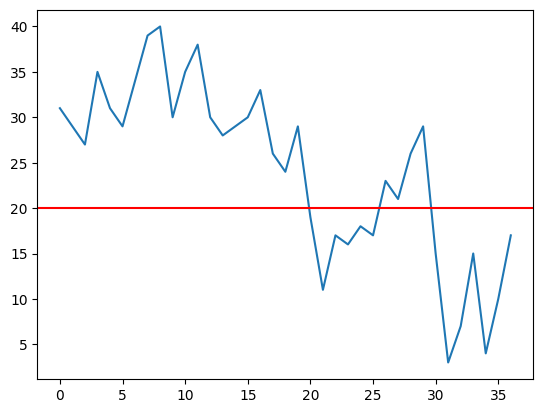

In [9]:
sequence = "TGCATGACTGCATCGATCGTACGATCGATCGATCGAT"
quality = [31, 29, 27, 35, 31, 29, 34, 39, 40, 30, 35, 38, 30, 28, 29, 30, 33, 26, 24, 29, 19, 11, 17, 16, 18, 17, 23, 21, 26, 29, 15, 3, 7, 15, 4, 10, 17]

import matplotlib.pyplot as plt

plt.plot(range(len(quality)), quality)
plt.axhline(20, color = "red")
plt.show()

i: 0 	base: T 	quality: 31
i: 1 	base: G 	quality: 29
i: 2 	base: C 	quality: 27
i: 3 	base: A 	quality: 35
i: 4 	base: T 	quality: 31
i: 5 	base: G 	quality: 29
i: 6 	base: A 	quality: 34
i: 7 	base: C 	quality: 39
i: 8 	base: T 	quality: 40
i: 9 	base: G 	quality: 30
i: 10 	base: C 	quality: 35
i: 11 	base: A 	quality: 38
i: 12 	base: T 	quality: 30
i: 13 	base: C 	quality: 28
i: 14 	base: G 	quality: 29
i: 15 	base: A 	quality: 30
i: 16 	base: T 	quality: 33
i: 17 	base: C 	quality: 26
i: 18 	base: G 	quality: 24
i: 19 	base: T 	quality: 29
i: 20 	base: A 	quality: 19


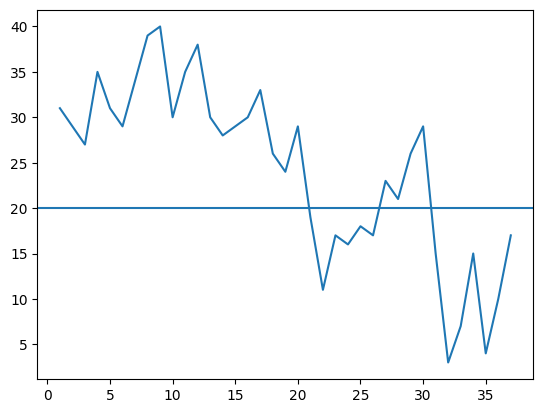

In [13]:
# Your code
i = 0

while i < len(sequence):
    print("i:", i, "\tbase:", sequence[i], "\tquality:", quality[i])

    if quality[i] <20:        # Stop the loop!
        break
        print(sequence)

    i += 1

import matplotlib.pyplot as plt
x_axis = range(1,len(quality)+1)
plt.plot(x_axis, quality)
plt.axhline(20)

# Exercise - Loops, lists, and ifs
**Objective**: Take our list of genes and output the most up/down regulated genes with key information

This exercise is the most dificult we've done and will need you to use lists, loops, ifs, and dictionaries! It is not supposed to be simple and probably will take 10-20 minutes.

Suggested steps:

1.   Make empty lists for your up/down gene lists
2.   Make a loop to run through the list of gene expression values and use if/else to build your lists
3.   Itterate through your new lists and use the dictionary to report if they have been qPCR tested
4.   Output in a clean text format such as:

"Here we tested X genes resulting in Y upregulated and Z downregulated. qPCR confirmed A and B respectively. Here is the full list:"


**Extension:** Filter the data to greater than +/- 2 expression. What % of genes are removed by this filter?


In [3]:
# Data for your analysis
gene_list = ["TP53", "BRCA1", "EGFR", "KRAS", "MYC", "PTEN", "CDKN2A", "AKT1", "ERBB2", "RB1", "PIK3CA", "BRAF", "MET", "JAK2", "MAPK1", "NOTCH1", "FLT3", "KRAS", "EGFR", "PTEN", "TP53", "BRAF", "PIK3CA", "MYC", "ERBB2", "RB1", "AKT1", "CDKN2A", "MAPK1", "JAK2"]
gene_exp = [['TP53', -1.4245], ['BRCA1', 4.0941], ['EGFR', 1.8266], ['KRAS', -0.8996], ['MYC', -2.1188], ['PTEN', -1.8499], ['CDKN2A', 4.2798], ['AKT1', 0.4709], ['ERBB2', 2.144], ['RB1', 4.7541], ['PIK3CA', 2.6291], ['BRAF', 2.1514], ['MET', 0.2558], ['JAK2', 5.0332], ['MAPK1', 5.295], ['NOTCH1', 2.5695], ['FLT3', 5.3211], ['KRAS', 3.064], ['EGFR', 0.1768], ['PTEN', -0.4923], ['TP53', -4.7796], ['BRAF', -3.8257], ['PIK3CA', 0.3357], ['MYC', -0.0917], ['ERBB2', -3.2586], ['RB1', -0.7903], ['AKT1', 0.6729], ['CDKN2A', 5.8131], ['MAPK1', -4.9549], ['JAK2', -0.936]]
qPCR_status = {'TP53': False, 'BRCA1': False, 'EGFR': True, 'KRAS': False, 'MYC': True, 'PTEN': True, 'CDKN2A': False, 'AKT1': True, 'ERBB2': False, 'RB1': False, 'PIK3CA': True, 'BRAF': False, 'MET': False, 'JAK2': True, 'MAPK1': False, 'NOTCH1': False, 'FLT3': True}


In [19]:
# Your code here
ups = []
downs = []

print("Up genes:")
for geneID, exp in gene_exp:
    if exp > 0 and qPCR_status.get(geneID):
        ups.append(geneID)
    elif exp < 0 and qPCR_status.get(geneID):
        downs.append(geneID)

print(ups)
print(downs)

print("Here we tested", len(gene_list), "genes resulting in", len(ups), "upregulated and", len(downs), "downregulated. qPCR confirmed A and B respectively. Here is the full list:")

Up genes:
['EGFR', 'AKT1', 'PIK3CA', 'JAK2', 'FLT3', 'EGFR', 'PIK3CA', 'AKT1']
['MYC', 'PTEN', 'PTEN', 'MYC', 'JAK2']
Here we tested 30 genes resulting in 8 upregulated and 5 downregulated. qPCR confirmed A and B respectively. Here is the full list:
